## Desarrollo de un modelo de Machine Learning de Principio a fin

Vamos a resolver un problema clásico de machine learning, intentaremos predecir el valor de las viviendas de California  dada referencias geográficas y contextos socio demográficos

Si quiere profundizar sobre este problema lo invito a que lea toda la descripción que propociona kaggle y vea como otros data scientist han resuelto estos problemas : https://www.kaggle.com/datasets/camnugent/california-housing-prices


In [58]:
## 1. Descarga la base de datos
# Tomado de ageron
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [59]:
## 1. Explorando la base de datos

# Lo primero que debemos hacer es ver con que datos contamos

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [60]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [15]:
# Fijense que hay datos faltantes en la variable total_bedrooms

housing.isna().sum().reset_index(False, name='Missing_values').sort_values(by='Missing_values', ascending=False)

,index,Missing_values
4,total_bedrooms,207
0,longitude,0
1,latitude,0
2,housing_median_age,0
3,total_rooms,0
5,population,0
6,households,0
7,median_income,0
8,median_house_value,0
9,ocean_proximity,0


In [19]:
(housing.isna().mean()*100)\
    .round(3)\
    .reset_index(False,
                 name='Missing_values')\
    .sort_values(by='Missing_values', ascending=False)

,index,Missing_values
4,total_bedrooms,1.003
0,longitude,0.000
1,latitude,0.000
2,housing_median_age,0.000
3,total_rooms,0.000
5,population,0.000
6,households,0.000
7,median_income,0.000
8,median_house_value,0.000
9,ocean_proximity,0.000


In [20]:
housing = housing.dropna(subset=['total_bedrooms']).reset_index(drop=True)
housing.shape

(20433, 10)

In [23]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


/Users/danieljimenez/opt/anaconda3/envs/end-to-end/lib/python3.10/site-packages/dabl/preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])


Target looks like regression


/Users/danieljimenez/opt/anaconda3/envs/end-to-end/lib/python3.10/site-packages/dabl/plot/supervised.py:214: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = X_new.groupby(col)[target_col].median()


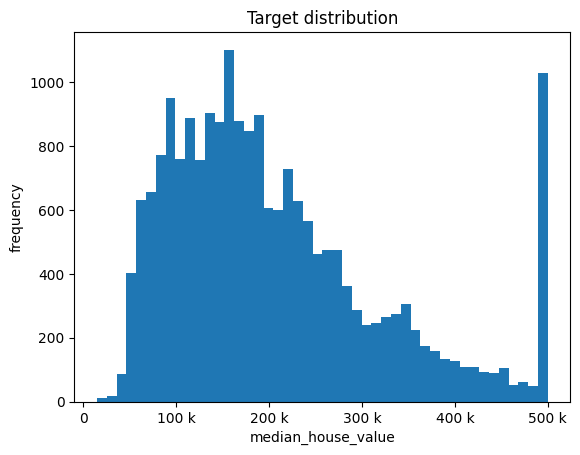

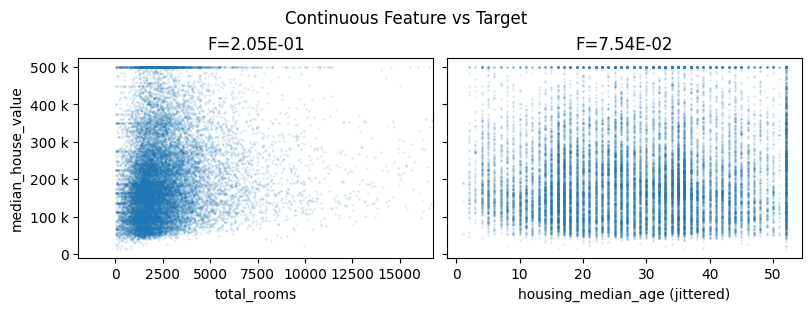

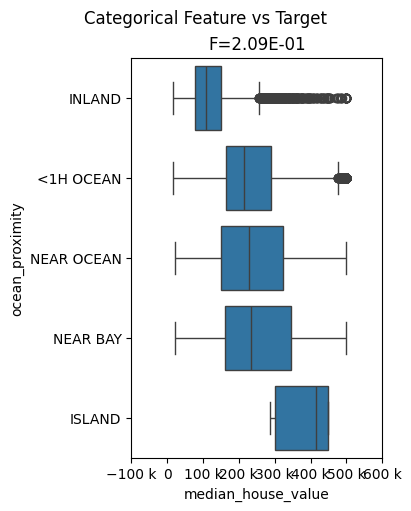

In [27]:
# dabl es una herramienta para explorar datos de manera automatica
#https://amueller.github.io/dabl/dev/user_guide.html#philosophy
#!pip install dabl
import dabl
import matplotlib.pyplot as plt
dabl.plot(housing[['housing_median_age','total_rooms','median_house_value','ocean_proximity']], target_col="median_house_value")
plt.show()

In [28]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

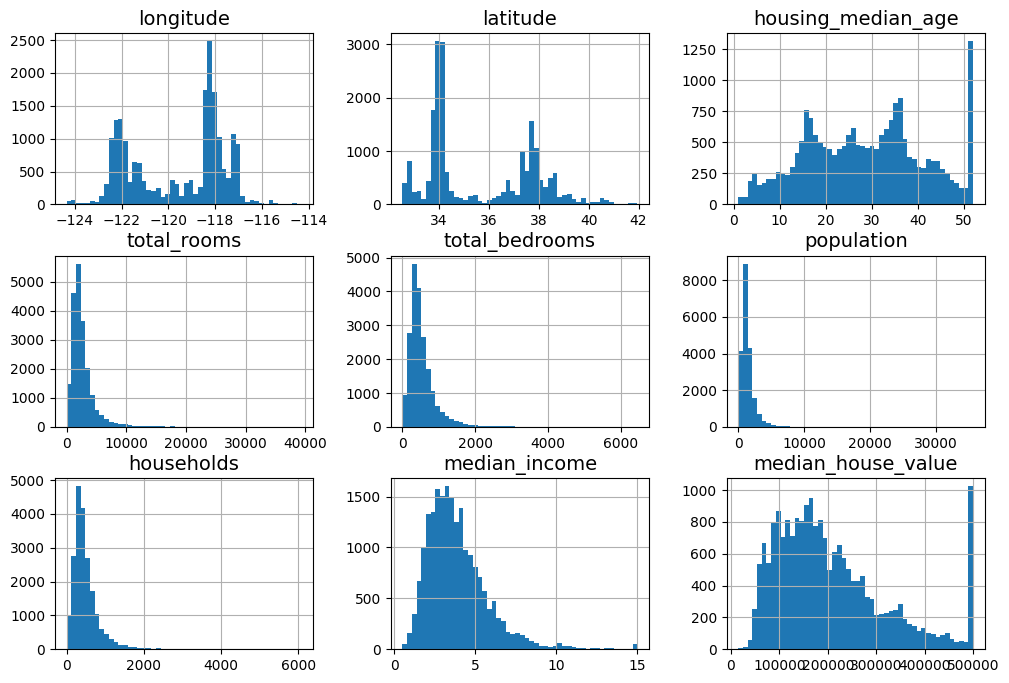

In [29]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
plt.show()

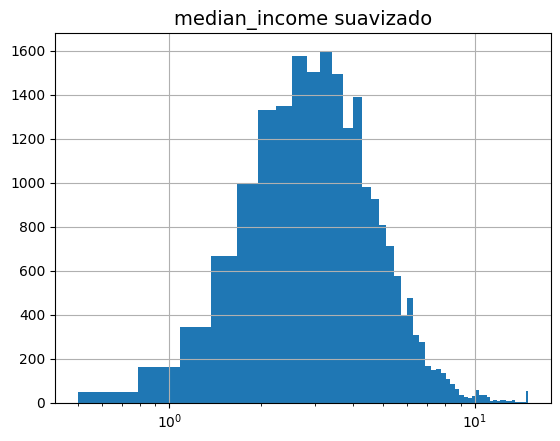

In [31]:
housing['median_income'].hist(bins=50)
plt.xscale('log')
plt.title('median_income suavizado')
plt.show()

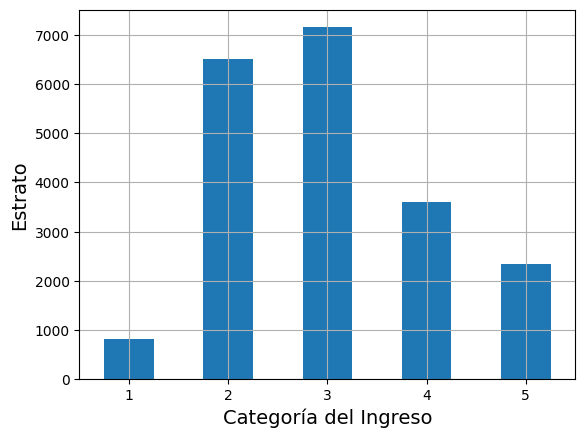

In [32]:
## Refacotrizando los ingresos
import numpy as np
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

housing["income_cat"]\
    .value_counts()\
    .sort_index()\
    .plot.bar(rot=0, grid=True)
plt.xlabel("Categoría del Ingreso")
plt.ylabel("Estrato")
plt.show()

In [33]:
## Estratificando las muestras
#Se importa StratifiedShuffleSplit de sklearn.model_selection, que es una herramienta para dividir tus datos en conjuntos de entrenamiento y prueba, manteniendo la proporción de una variable categórica en ambos conjuntos.
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []

#Este código divide tu conjunto de datos housing en 10 pares diferentes de conjuntos de entrenamiento y prueba, manteniendo la proporción de la variable income_cat en ambos conjuntos.La lista strat_splits contendrá 10 pares de estos conjuntos divididos.


for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [34]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = strat_splits[0]
#Esto cuenta los valores de income_cat en el conjunto de prueba y los divide por el número total de elementos en el conjunto de prueba, para obtener las proporciones de cada categoría.
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350135
2    0.318816
4    0.176658
5    0.114509
1    0.039883
Name: count, dtype: float64

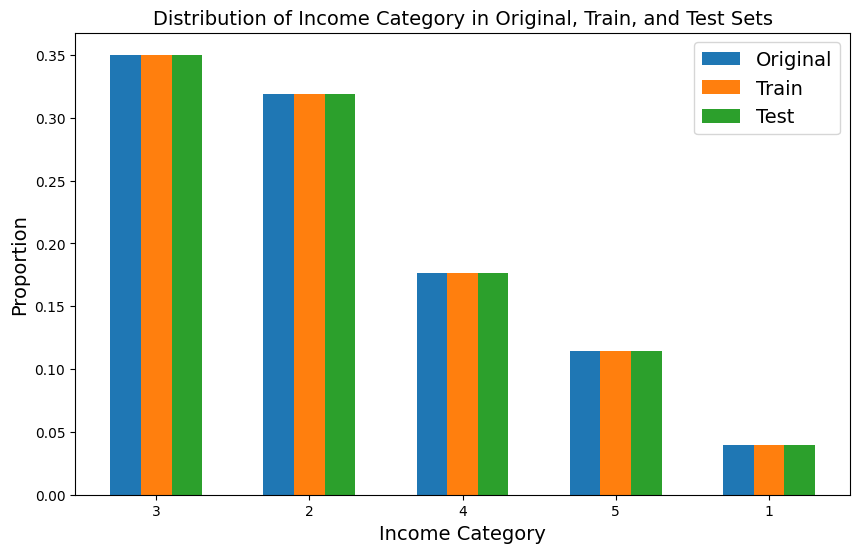

In [35]:
import matplotlib.pyplot as plt

# Distribución original
original_dist = housing["income_cat"].value_counts() / len(housing)

# Distribución en el conjunto de prueba estratificado
test_dist = strat_test_set["income_cat"].value_counts() / len(strat_test_set)

# Distribución en el conjunto de entrenamiento estratificado
train_dist = strat_train_set["income_cat"].value_counts() / len(strat_train_set)

# Crear el gráfico
labels = original_dist.index
x = range(len(labels))

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, original_dist, width=0.2, label='Original', align='center')
ax.bar([i + 0.2 for i in x], train_dist, width=0.2, label='Train', align='center')
ax.bar([i + 0.4 for i in x], test_dist, width=0.2, label='Test', align='center')

ax.set_xticks([i + 0.2 for i in x])
ax.set_xticklabels(labels)
ax.set_xlabel('Income Category')
ax.set_ylabel('Proportion')
ax.legend()
ax.set_title('Distribution of Income Category in Original, Train, and Test Sets')

plt.show()


 La división estratificada asegura que ambas muestras (entrenamiento y prueba) sean representativas del conjunto de datos original en términos de la variable categórica income_cat. Esto es importante para garantizar que cualquier modelo entrenado en estos datos pueda generalizar bien a datos no vistos, manteniendo las proporciones de las categorías en las predicciones.


In [37]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.25,
                                       random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,3.99,3.78,0.11,-5.17
2,31.88,31.88,32.37,-0.01,1.54
3,35.02,35.01,34.59,-0.02,-1.24
4,17.67,17.67,17.56,-0.04,-0.65
5,11.44,11.45,11.70,0.12,2.34


El DataFrame final, compare_props, tendrá la siguiente estructura:

* Overall %: Proporciones de income_cat en el conjunto original.
* Stratified %: Proporciones de income_cat en el conjunto de prueba estratificado.
* Random %: Proporciones de income_cat en el conjunto de prueba aleatorio.
* Strat. Error %: Error porcentual de las proporciones estratificadas respecto a las proporciones originales.
* Rand. Error %: Error porcentual de las proporciones aleatorias respecto a las proporciones originales.


Este DataFrame te permite comparar cómo de bien las proporciones de las categorías de ingresos se mantienen en los diferentes conjuntos de datos (original, estratificado y aleatorio) y qué tan precisas son estas divisiones.

* División Estratificada: Las proporciones en el conjunto de prueba estratificado (Stratified %) están muy cerca de las proporciones del conjunto original (Overall %), lo que indica que la división estratificada ha mantenido bien las proporciones de las categorías de ingresos.

* División Aleatoria: Las proporciones en el conjunto de prueba aleatorio (Random %) presentan algunos desvíos más significativos en comparación con las proporciones del conjunto original, lo que indica que la división aleatoria no ha mantenido tan bien las proporciones de las categorías de ingresos.

In [38]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

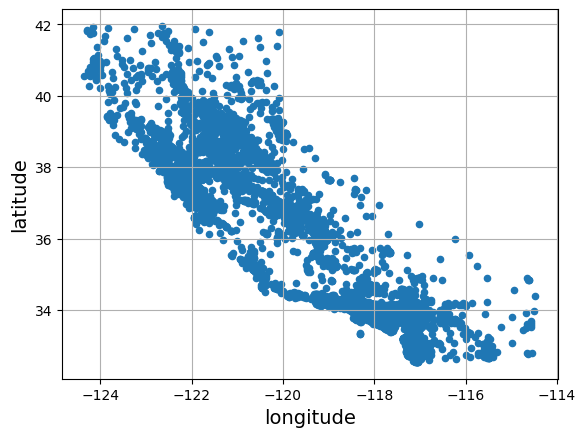

In [39]:
housing = strat_train_set.copy()
housing.plot(kind="scatter",
             x="longitude",
             y="latitude",
             grid=True)
plt.show()

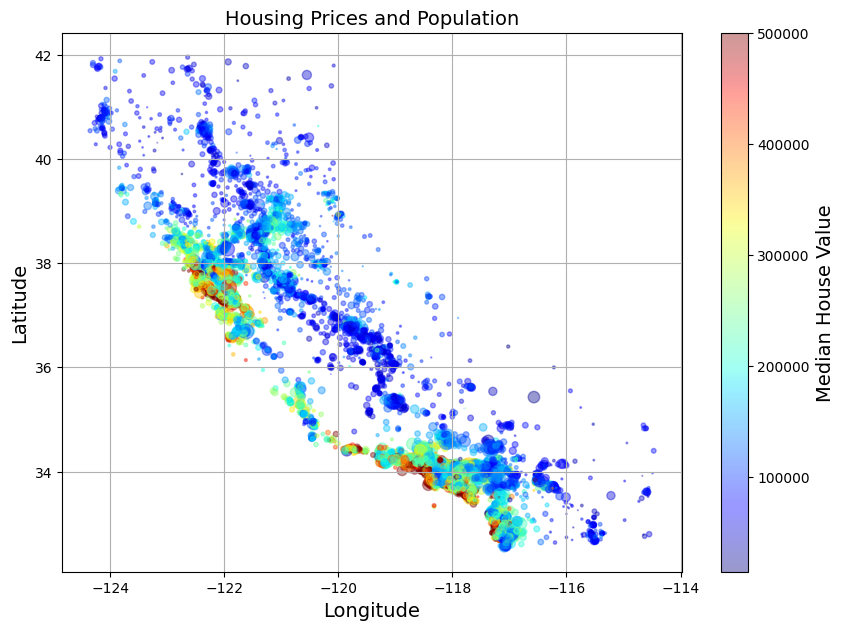

In [41]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(housing["longitude"], housing["latitude"],
                      alpha=0.4, c=housing["median_house_value"],
                      s=housing["population"]/100, label="Population",
                      cmap=plt.get_cmap("jet"))


colorbar = plt.colorbar(scatter)
colorbar.set_label('Median House Value')


plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Housing Prices and Population")


plt.grid(True)
plt.show()

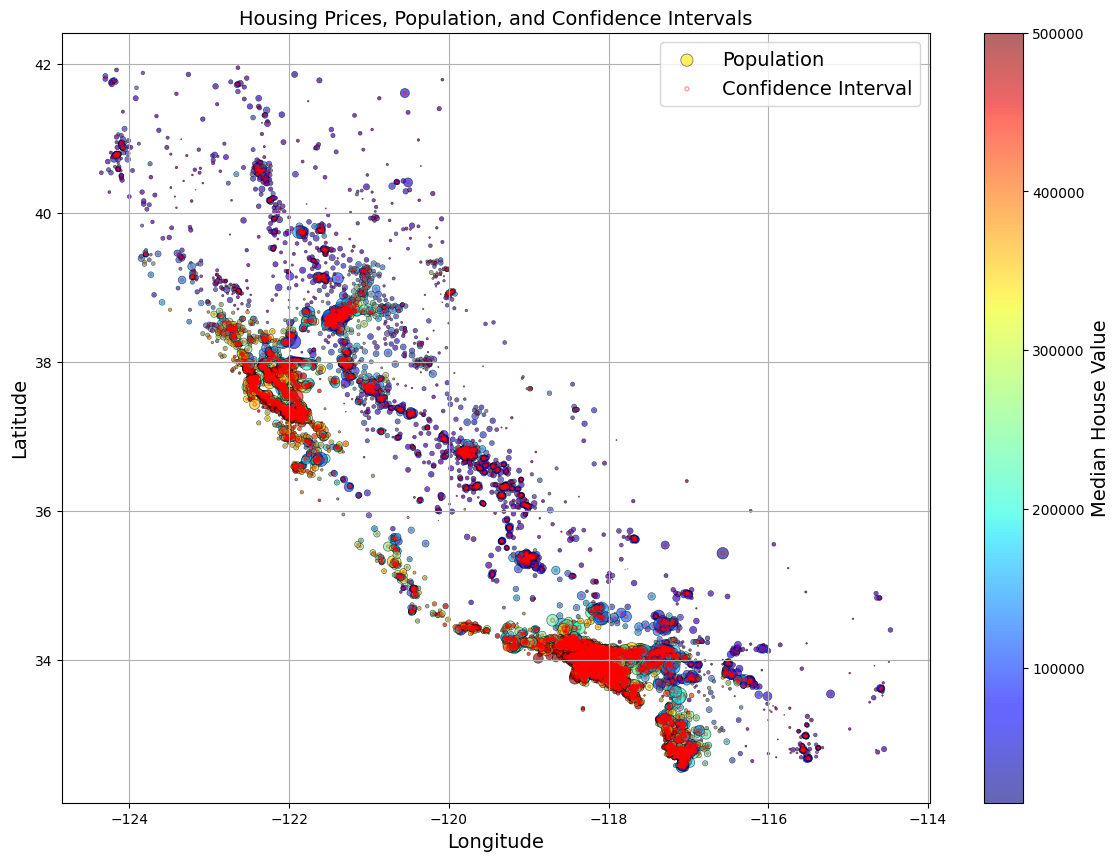

In [44]:
plt.figure(figsize=(14, 10))

# Gráfico principal
scatter = plt.scatter(housing["longitude"], housing["latitude"],
                      alpha=0.6, c=housing["median_house_value"],
                      s=housing["population"]/100, label="Population",
                      cmap=plt.get_cmap("jet"), edgecolor='k', linewidth=0.5)


confidence_interval = 0.1
sizes = housing["population"] / 100
confidence_intervals = sizes * confidence_interval
plt.scatter(housing["longitude"], housing["latitude"],
            s=confidence_intervals, edgecolor='r', facecolors='none', alpha=0.4, label="Confidence Interval")

# Barra de color
colorbar = plt.colorbar(scatter)
colorbar.set_label('Median House Value')

# Etiquetas y título
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Housing Prices, Population, and Confidence Intervals")

# Mostrar la cuadrícula
plt.grid(True)

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

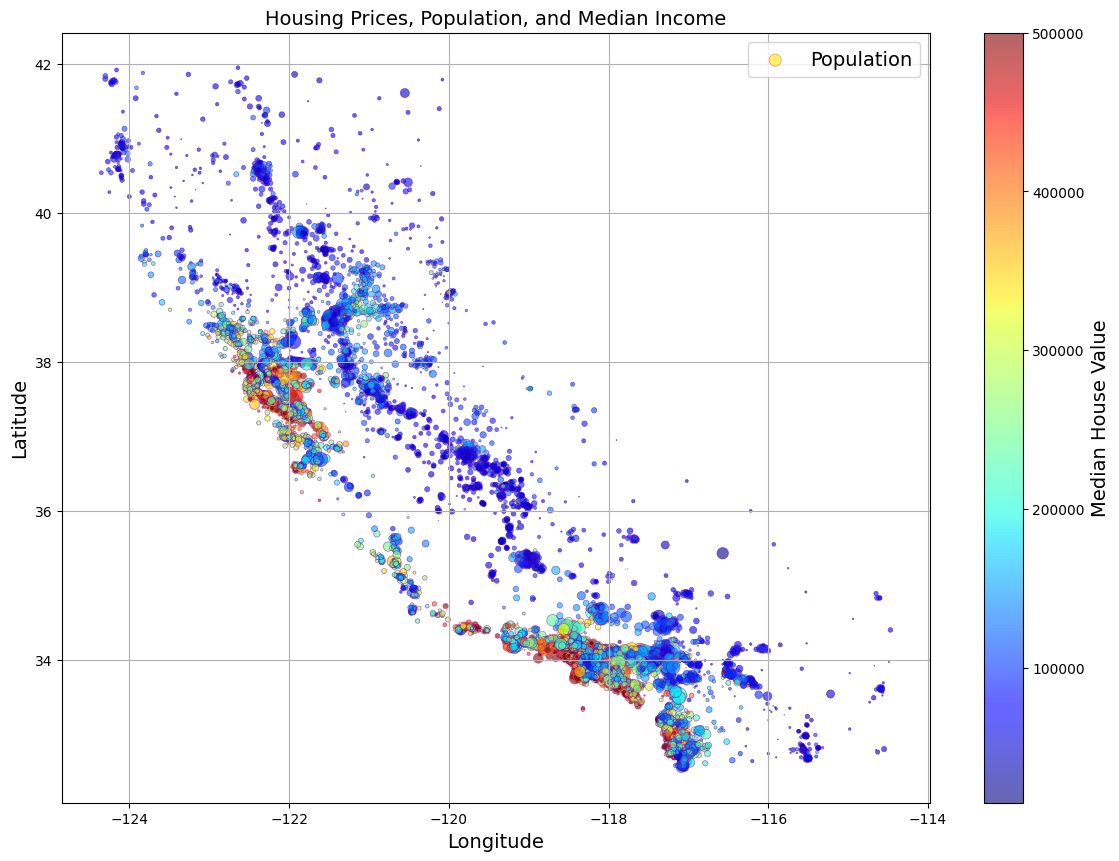

In [47]:
income_norm = (housing["median_income"] - housing["median_income"].min()) / \
              (housing["median_income"].max() - housing["median_income"].min())

plt.figure(figsize=(14, 10))


scatter = plt.scatter(housing["longitude"], housing["latitude"],
                      alpha=0.6, c=housing["median_house_value"],
                      s=housing["population"]/100, label="Population",
                      cmap=plt.get_cmap("jet"), edgecolor=plt.cm.plasma(income_norm), linewidth=0.5)


colorbar = plt.colorbar(scatter)
colorbar.set_label('Median House Value')


plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Housing Prices, Population, and Median Income")


plt.grid(True)
plt.legend()
plt.show()


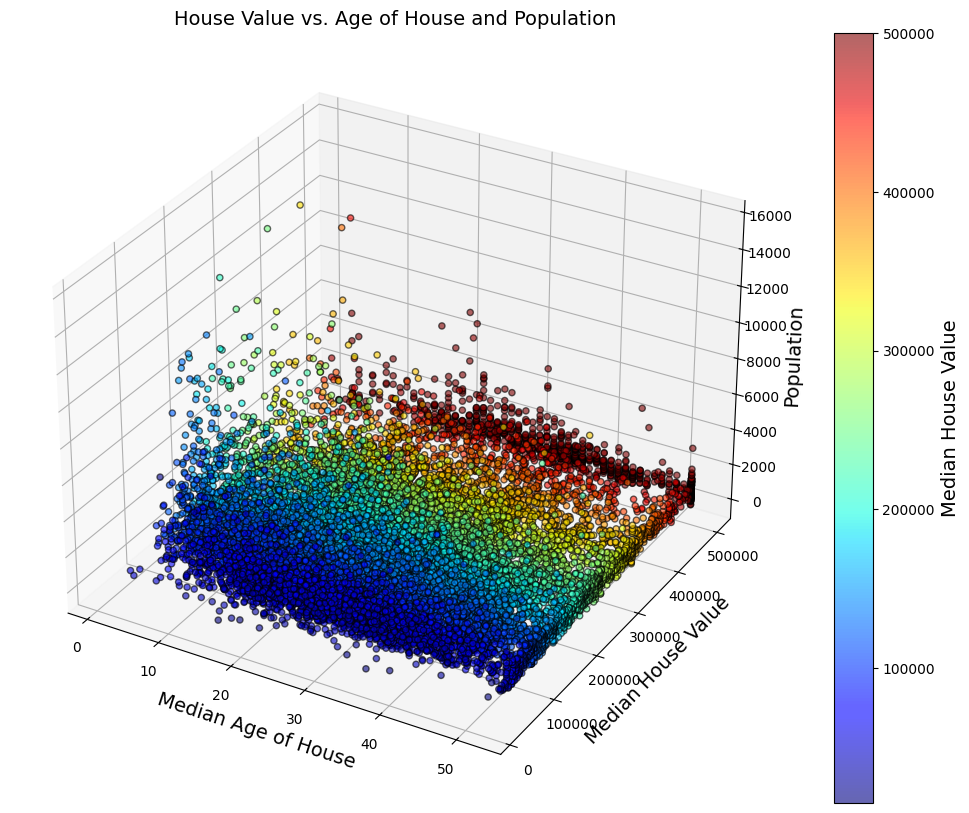

In [49]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


income_norm = (housing["median_income"] - housing["median_income"].min()) / \
              (housing["median_income"].max() - housing["median_income"].min())


fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')


scatter = ax.scatter(housing["housing_median_age"], housing["median_house_value"], housing["population"],
                     alpha=0.6, c=housing["median_house_value"], cmap=plt.get_cmap("jet"), edgecolor='k')


colorbar = plt.colorbar(scatter, ax=ax)
colorbar.set_label('Median House Value')


ax.set_xlabel("Median Age of House")
ax.set_ylabel("Median House Value")
ax.set_zlabel("Population")
ax.set_title("House Value vs. Age of House and Population")
plt.show()


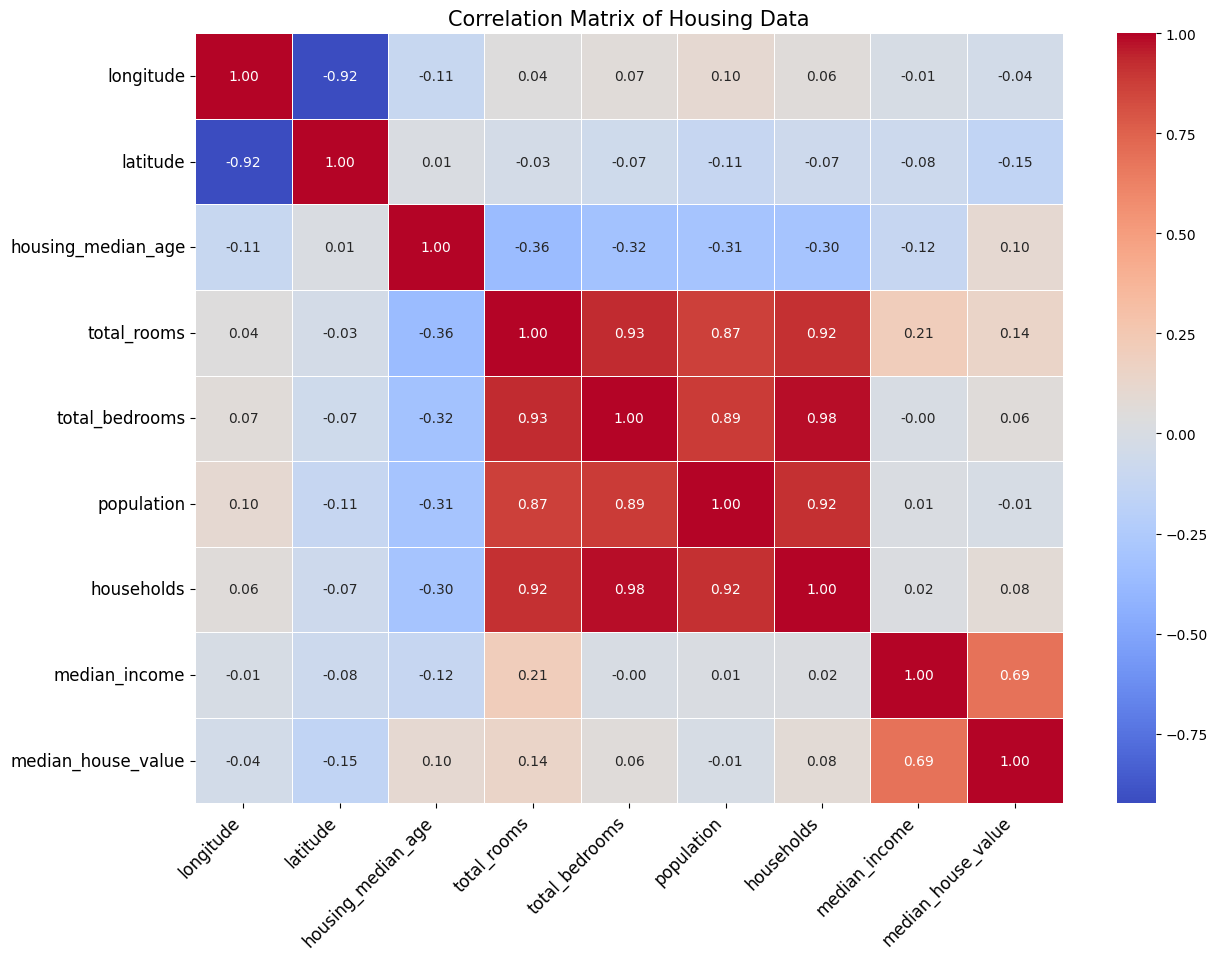

In [52]:
import seaborn as sns
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=0.5,
            annot_kws={"size": 10})
plt.title("Correlation Matrix of Housing Data", size=15)
plt.xticks(rotation=45, ha='right', size=12)
plt.yticks(size=12)
plt.show()


### Haciendo un modelo de Machine Learning

In [71]:
housing = housing.dropna(subset=['total_bedrooms']).reset_index(drop=True)
housing.shape

(20433, 10)

In [72]:
from sklearn.preprocessing import OrdinalEncoder

# Crear una copia del dataframe original para no modificar los datos originales
housing_encoded = housing.copy()

# Inicializar el codificador
ordinal_encoder = OrdinalEncoder()

# Aplicar el codificador a la columna 'ocean_proximity'
housing_encoded["ocean_proximity"] = ordinal_encoder.fit_transform(housing[["ocean_proximity"]])

# Verificar la transformación
housing_encoded["ocean_proximity"].head()


0    3.0
1    3.0
2    3.0
3    3.0
4    3.0
Name: ocean_proximity, dtype: float64

In [73]:
from sklearn.model_selection import train_test_split

# Separar características y etiqueta
X = housing_encoded.drop("median_house_value", axis=1)
y = housing_encoded["median_house_value"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Inicializar los modelos
lin_reg = LinearRegression()
forest_reg = RandomForestRegressor(random_state=42)
gbrt_reg = GradientBoostingRegressor(random_state=42)

# Entrenar los modelos
lin_reg.fit(X_train, y_train)
forest_reg.fit(X_train, y_train)
gbrt_reg.fit(X_train, y_train)

# Realizar predicciones
y_pred_lin = lin_reg.predict(X_test)
y_pred_forest = forest_reg.predict(X_test)
y_pred_gbrt = gbrt_reg.predict(X_test)

# Calcular el MSE y el RMSE para cada modelo
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)

mse_forest = mean_squared_error(y_test, y_pred_forest)
rmse_forest = np.sqrt(mse_forest)

mse_gbrt = mean_squared_error(y_test, y_pred_gbrt)
rmse_gbrt = np.sqrt(mse_gbrt)

# Mostrar los resultados
print(f"Linear Regression RMSE: {rmse_lin}")
print(f"Random Forest RMSE: {rmse_forest}")
print(f"Gradient Boosting RMSE: {rmse_gbrt}")

Linear Regression RMSE: 70026.87211699889
Random Forest RMSE: 49870.31480930469
Gradient Boosting RMSE: 55697.235017279025


## Mejorando el modelo seleccionado


### Cross Validation
La validación cruzada (cross-validation) es una técnica utilizada en la evaluación de modelos de machine learning para asegurarse de que el modelo generaliza bien a datos no vistos. Es especialmente útil cuando tienes un conjunto de datos limitado y quieres estimar de manera más confiable el rendimiento de tu modelo.



In [75]:
from sklearn.model_selection import cross_val_score

# Inicializar los modelos
lin_reg = LinearRegression()
forest_reg = RandomForestRegressor(random_state=42)
gbrt_reg = GradientBoostingRegressor(random_state=42)

# Definir la métrica de evaluación
scoring = 'neg_mean_squared_error'

# Realizar validación cruzada
scores_lin = cross_val_score(lin_reg, X, y, scoring=scoring, cv=10)
scores_forest = cross_val_score(forest_reg, X, y, scoring=scoring, cv=10)
scores_gbrt = cross_val_score(gbrt_reg, X, y, scoring=scoring, cv=10)

# Convertir los puntajes a RMSE
rmse_scores_lin = np.sqrt(-scores_lin)
rmse_scores_forest = np.sqrt(-scores_forest)
rmse_scores_gbrt = np.sqrt(-scores_gbrt)

# Mostrar los resultados
print(f"Linear Regression 10-fold RMSE: {rmse_scores_lin.mean()} ± {rmse_scores_lin.std()}")
print(f"Random Forest 10-fold RMSE: {rmse_scores_forest.mean()} ± {rmse_scores_forest.std()}")
print(f"Gradient Boosting 10-fold RMSE: {rmse_scores_gbrt.mean()} ± {rmse_scores_gbrt.std()}")


Linear Regression 10-fold RMSE: 69656.9635746118 ± 1451.281521246884
Random Forest 10-fold RMSE: 49169.70687661231 ± 2292.763467055766
Gradient Boosting 10-fold RMSE: 55206.022965868804 ± 1631.9789879418113


In [ ]:
## Ajustando los mejores modelos

from sklearn.model_selection import GridSearchCV

# Definir los parámetros para Grid Search
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

param_grid_gbrt = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar los modelos
rf = RandomForestRegressor(random_state=42)
gbrt = GradientBoostingRegressor(random_state=42)

# Inicializar Grid Search
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf,
                              cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_gbrt = GridSearchCV(estimator=gbrt, param_grid=param_grid_gbrt,
                                cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Ejecutar Grid Search para RandomForestRegressor
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

# Ejecutar Grid Search para GradientBoostingRegressor
grid_search_gbrt.fit(X_train, y_train)
best_gbrt = grid_search_gbrt.best_estimator_

# Imprimir los mejores parámetros
print("Best parameters for RandomForestRegressor: ", grid_search_rf.best_params_)
print("Best parameters for GradientBoostingRegressor: ", grid_search_gbrt.best_params_)


/Users/danieljimenez/opt/anaconda3/envs/end-to-end/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/danieljimenez/opt/anaconda3/envs/end-to-end/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
774 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/danieljimenez/opt/anaconda3/envs/end-to-end/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and

In [ ]:
import matplotlib.pyplot as plt

# Entrenar los modelos con los mejores parámetros
best_rf.fit(X_train, y_train)
best_gbrt.fit(X_train, y_train)

# Obtener las importancias de las características
importances_rf = best_rf.feature_importances_
importances_gbrt = best_gbrt.feature_importances_

# Ordenar las características por importancia
indices_rf = np.argsort(importances_rf)[::-1]
indices_gbrt = np.argsort(importances_gbrt)[::-1]

# Nombres de las características
features = X_train.columns

# Crear el gráfico
plt.figure(figsize=(14, 6))

# Importancia de características para RandomForestRegressor
plt.subplot(1, 2, 1)
plt.title("Feature Importances - RandomForestRegressor")
plt.bar(range(X_train.shape[1]), importances_rf[indices_rf], align='center')
plt.xticks(range(X_train.shape[1]), features[indices_rf], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")

# Importancia de características para GradientBoostingRegressor
plt.subplot(1, 2, 2)
plt.title("Feature Importances - GradientBoostingRegressor")
plt.bar(range(X_train.shape[1]), importances_gbrt[indices_gbrt], align='center')
plt.xticks(range(X_train.shape[1]), features[indices_gbrt], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")

# Mostrar el gráfico
plt.tight_layout()
plt.show()
